# EXOPLANETS III: Exoplanet transit modelling

*Transits* happen when an exoplanetary system has the right orienation so that the exoplanet passes in front of its host star. This results to a dimming in the brightness of the star. 

![transit](transit.gif)

## Exoplanet properties from transits

We can find some of the exoplanet properties by looking at the transit curves

### Exoplanet period

The time between two successive transits gives us the period of the exoplanet around its star

![period](hatp7period.png)

### Exoplanet radius

The depth of the transit gives us the radius of the exoplanet

## $R_p=R_\star *\sqrt{depth}$

In the example below the depth is 0.007 (from 1 to 0.993), i.e. 0.7%. Therefore the radius of the planet is 
$R_p=R_\star *\sqrt{0.007}=0.08 R_\star$

![depth](hatp7depth.png)

## Task overview

Here we will use a transit model to see the effect of different parameters on the transit curve. First we will import some packages:


In [1]:
# Import some python basic  modules
import numpy as np
import matplotlib.pyplot as plt

# Import the module that has the transit model (forTrans)
from PyAstronomy.modelSuite import forTrans as ft

We will use the fuction MandelAgolLC to plot different transit curves. To find more about this function type the following:

In [2]:
ft.MandelAgolLC?


Init signature: ft.MandelAgolLC(orbit='circular', ld='quad', collCheck=True)
Docstring:     
Analytical transit light-curves using the formulae provided by Mandel & Agol 2002.

.. note :: The computation of transit light curves
           is done using the external *occultquad* FORTRAN library.
           
           This library can be installed, e.g., via
           
           pip install PyAstronomy_ext
           
           It can also be compiled manually using SciPy's f2py
           wrapper (http://www.scipy.org/F2py). Simply go to the
           *forTrans* directory of the source distribution of PyAstronomy,
           then invoke

           f2py -c occultquad.pyf occultquad.f

           f2py -c occultnl.pyf occultnl.f

:Model parameters:

The set of parameters specifying this model depends on: the type
of orbit chosen (circular or keplerian) and the type of limb darkening
chosen (quadratic or non-linear).

More information on the Keplerian orbit can be found here: :ref:`ke

The code below sets some parameters for the planet and then plots the relative flux of the star (energy per unit time and unit area). When the relative flux is 1 then the planet does not block the light from the star. When the relative flux is say 0.95, it means that the planet blocks 5% of the stellar light. Study the code to understand the meaning of the input parameters (you can modify some parameters are re-run the kernel to see what happens).

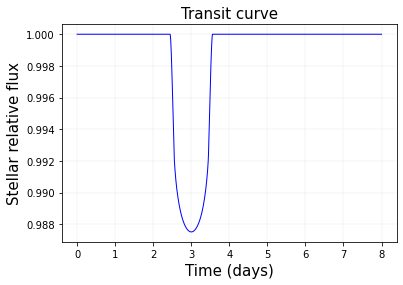

In [3]:
# Create MandelAgolLC object (planet) with circular orbit and quadratic limb darkening
planet =  ft.MandelAgolLC(orbit="circular", ld="quad")

# Set parameters of planetary system
# "planet" contains the properties of the plane that determine the transit curve

#Parameter 1: Planet orbital period (days)
planet["per"] = 6

#Parameter 2:Orientation of the planet orbit with respect to the observed
# (i=90 degrees, means the planet transits through the middle of the stellar disc)
planet["i"] = 90

#Parameter 3:Semi-major axis of planetary orbit [stellar radii]
planet["a"] = 2

#Parameter 4: Time offset of transit center (effectively where is the lowest drop of the stellar flux)
planet["T0"] = 3.

#Parameter 5: Radius ratio between planet and star.
planet["p"] = 0.1

#Other parameters (do not modify these -no need to worry about these now)
planet["linLimb"] = 0.5
planet["quadLimb"] = 0.2
planet["b"] = 0.

# Choose some time axis
# this defines the time sampling (how often do you observe the star)
time = np.linspace(0, 8, 1000)

# Calculate the time evolution of the stellar brightness using the transit model
# The function evaluate acts on "planet" to give the stellar_flux vs time
stellar_flux = planet.evaluate(time)

plt.title ("Transit curve", fontsize = 15)
plt.xlabel("Time (days)", fontsize = 15)
plt.ylabel("Stellar relative flux", fontsize = 15)

# put grid on the graph
plt.grid(color='grey', linestyle=':', linewidth=0.2)
plt.grid(True)

# Let's see what happened ...
plt.plot(time, stellar_flux, color='blue', linewidth=1)

plt.show()

Above you see a theoretical transit curve that can be used to match observations and calculate the properties of a planet.

### Important note: 
To "define" a transit function you need to set all the parameters below of each planet (these are some typical values)

In [4]:
# this defines a variable called "planet"
planet=  ft.MandelAgolLC(orbit="circular", ld="quad")

#the following define the properties of the variable "planet"

#set planet  properties (you need to modify these for your tasks)
planet["per"]= 6
planet["a"] = 2
planet["T0"] = 3.
planet["p"] = 0.2
#Other parameters (do not modify these for your tasks)
planet["i"] = 90
planet["linLimb"] = 0.5
planet["quadLimb"] = 0.2
planet["b"] = 0.

## Task IIIa: The effect of the size of the planet

Use the above model to plot the transit curves of 2 planets, one with Earth radius and the other with Jupiter radius, orbiting around the Sun. The rest of the properties remain as set above (both have an orbital period of 6 days). Don't forget to label the different curves.

You will need the following:

Earth radius $R_\oplus= 3371$ km

Jupiter radius $R_J=69,911$ km

Solar radius  $R_\odot=696,340$ km





In [5]:
# convert Earth and Jupiter radii in solar units 

#set the variables in the values in km
R_saturn=58232
R_jup=69911
R_sun=696340

#convert
R_saturn=R_saturn/R_sun
R_jup=R_jup/R_sun
R_sun=R_sun/R_sun

# check the values (print in scientific notation)

print (" Saturn radius=%.2e, Jupiter radius= %.2e, Solar radius=%.2e (in Solar units)" % (R_saturn, R_jup, R_sun))

 Saturn radius=8.36e-02, Jupiter radius= 1.00e-01, Solar radius=1.00e+00 (in Solar units)


In [6]:
# Define two planets, one Earth, one Jupiter

planet1=  ft.MandelAgolLC(orbit="circular", ld="quad")

#set planet Saturn properties
planet1["per"]= 6
planet1["a"] = 2
planet1["T0"] = 3.
planet1["p"] = R_saturn
#Other parameters (do not modify these)
planet1["i"] = 90
planet1["linLimb"] = 0.5
planet1["quadLimb"] -0.2
planet1["b"] = 0.

planet2=  ft.MandelAgolLC(orbit="circular", ld="quad")

#set planet Jupiter properties
planet2["per"]= 6
planet2["a"] = 2
planet2["T0"] = 3.
planet2["p"] = R_jup
#Other parameters (do not modify these)
planet2["i"] = 90
planet2["linLimb"] = 0.5
planet2["quadLimb"] = 0.2
planet2["b"] = 0.

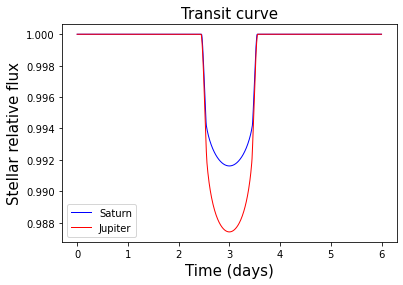

In [7]:
# plot the transits on the same plot

# Choose some time axis
# this defines the time sampling (how often do you observe the star)
time = np.linspace(0, 6, 1000)

# Calculate the time evolution of the stellar brightness using the transit model
# The function evaluate acts on "planet" to give the stellar_flux vs time

# Saturn
stellar_flux1 = planet1.evaluate(time)
# Jupiter
stellar_flux2 = planet2.evaluate(time)

plt.title ("Transit curve", fontsize = 15)
plt.xlabel("Time (days)", fontsize = 15)
plt.ylabel("Stellar relative flux", fontsize = 15)

# Let's see what happened ...
plt.plot(time, stellar_flux1, color='blue', linewidth=1, label="Saturn")
plt.plot(time, stellar_flux2, color='red', linewidth=1, label="Jupiter")
plt.legend()

plt.show()

## Task IIIb: The effect of the planet semi-major axis

Create a  Jupiter planet that orbits at a distance 5 times the stellar radius (i.e. planet["a"] = 5). Plot them  on the same graph and compare with the Jupiter from the previous task.

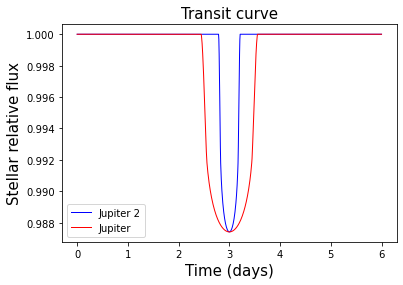

In [8]:
planet3=  ft.MandelAgolLC(orbit="circular", ld="quad")

#set planet Jupiter properties
planet3["per"]= 6
planet3["a"] = 5
planet3["T0"] = 3.
planet3["p"] = R_jup
#Other parameters (do not modify these)
planet3["i"] = 90
planet3["linLimb"] = 0.5
planet3["quadLimb"] = 0.2
planet3["b"] = 0.

# Choose some time axis
# this defines the time sampling (how often do you observe the star)
time = np.linspace(0, 6, 1000)

# Calculate the time evolution of the stellar brightness using the transit model
# The function evaluate acts on "planet" to give the stellar_flux vs time


# Jupiter 2
stellar_flux3 = planet3.evaluate(time)

plt.title ("Transit curve", fontsize = 15)
plt.xlabel("Time (days)", fontsize = 15)
plt.ylabel("Stellar relative flux", fontsize = 15)

# Let's see what happened ...
plt.plot(time, stellar_flux3, color='blue', linewidth=1, label="Jupiter 2")
plt.plot(time, stellar_flux2, color='red', linewidth=1, label="Jupiter")
plt.legend()

plt.show()

## Task IIIc: The effect of the orientation of the planet orbit  

Create  Jupiter planet that orbits with an oriantaiion of 85 degrees with respect to the observer (i.e. the planet does not pass exactly at the centre of the stellar disc). Plot both transits on the same graph.


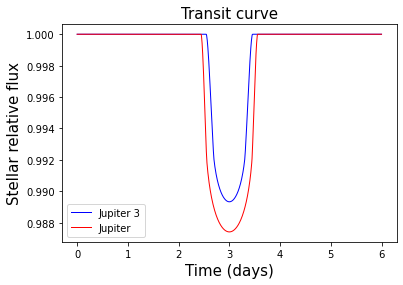

In [9]:
planet4=  ft.MandelAgolLC(orbit="circular", ld="quad")


#set planet Jupiter properties
planet4["per"]= 6
planet4["a"] = 2
planet4["T0"] = 3.
planet4["p"] = R_jup
#Other parameters (do not modify these)
planet4["i"] = 70
planet4["linLimb"] = 0.5
planet4["quadLimb"] = 0.2
planet4["b"] = 0.

# Choose some time axis
# this defines the time sampling (how often do you observe the star)
time = np.linspace(0, 6, 1000)

# Calculate the time evolution of the stellar brightness using the transit model
# The function evaluate acts on "planet" to give the stellar_flux vs time


# Jupiter 3
stellar_flux4 = planet4.evaluate(time)

plt.title ("Transit curve", fontsize = 15)
plt.xlabel("Time (days)", fontsize = 15)
plt.ylabel("Stellar relative flux", fontsize = 15)

# Let's see what happened ...
plt.plot(time, stellar_flux4, color='blue', linewidth=1, label="Jupiter 3")
plt.plot(time, stellar_flux2, color='red', linewidth=1, label="Jupiter")
plt.legend()

plt.show()

## Task IIId: Multi-planetary systems

Plot the stellar relative flux of  a star like the Sun with a planetary system consisting of two planets with the following parameters

### System I

Planet 1:per1=6 days, a1=2, p1= 0.2, T0=3

Planet 2:per1=3 days, a1=3, p1= 0.1, T0=3.5

### System II

Planet 1:per1=6 days, a1=2, p1= 0.2, T0=3

Planet 2:per1=1.5 days, a1=3, p1= 0.3, T0=3.5


Hint: For each system you need to define two "planets" and then add them together  to find the final effect on the star.

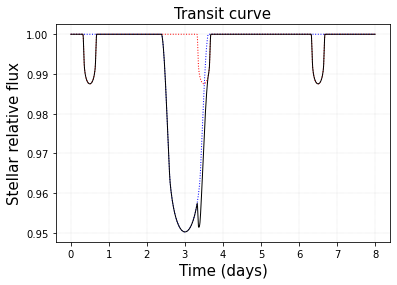

In [10]:
# create mplanet 1
mplanet1 =  ft.MandelAgolLC(orbit="circular", ld="quad")
#set planet 1 properties
mplanet1["per"]= 6
mplanet1["a"] = 2
mplanet1["T0"] = 3.
mplanet1["p"] = 0.2
#Other parameters (do not modify these)
mplanet1["i"] = 90
mplanet1["linLimb"] = 0.5
mplanet1["quadLimb"] = 0.2
mplanet1["b"] = 0.

# create mplanet 2
mplanet2 =  ft.MandelAgolLC(orbit="circular", ld="quad")
#set planet 1 properties
mplanet2["per"]= 3
mplanet2["a"] = 3
mplanet2["T0"] = 3.5
mplanet2["p"] = 0.1
#Other parameters (do not modify these)
mplanet2["i"] = 90
mplanet2["linLimb"] = 0.5
mplanet2["quadLimb"] = 0.2
mplanet2["b"] = 0.


# define the time axis
time = np.linspace(0, 8, 1000)
#calculate the relevant fluxes
mstellar_flux1 = mplanet1.evaluate(time)
mstellar_flux2 = mplanet2.evaluate(time)

plt.title ("Transit curve", fontsize = 15)
plt.xlabel("Time (days)", fontsize = 15)
plt.ylabel("Stellar relative flux", fontsize = 15)

# put grid on the graph
plt.grid(color='grey', linestyle=':', linewidth=0.2)
plt.grid(True)

# Let's see what happened ...
plt.plot(time, mstellar_flux1, color='blue', linestyle = 'dotted', linewidth=1)
plt.plot(time, mstellar_flux2, color='red',linestyle = 'dotted', linewidth=1)

plt.plot(time, mstellar_flux2+mstellar_flux1-1, linewidth=1, color='black')

plt.show()

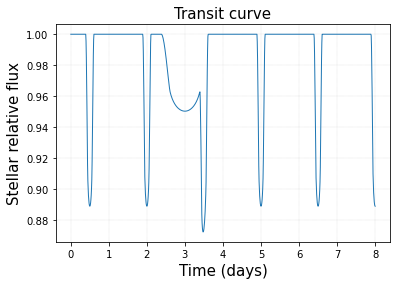

In [11]:

# create mplanet 3
mplanet3 =  ft.MandelAgolLC(orbit="circular", ld="quad")
#set planet 1 properties
mplanet3["per"]= 6
mplanet3["a"] = 2
mplanet3["T0"] = 3.
mplanet3["p"] = 0.2
#Other parameters (do not modify these)
mplanet3["i"] = 90
mplanet3["linLimb"] = 0.5
mplanet3["quadLimb"] = 0.2
mplanet3["b"] = 0.

# create mplanet 4
mplanet4 =  ft.MandelAgolLC(orbit="circular", ld="quad")
#set planet 1 properties
mplanet4["per"]= 1.5
mplanet4["a"] = 3
mplanet4["T0"] = 3.5
mplanet4["p"] = 0.3
#Other parameters (do not modify these)
mplanet4["i"] = 90
mplanet4["linLimb"] = 0.5
mplanet4["quadLimb"] = 0.2
mplanet4["b"] = 0.


# define the time axis
time = np.linspace(0, 8, 1000)
#calculate the relevant fluxes
mstellar_flux3 = mplanet3.evaluate(time)
mstellar_flux4 = mplanet4.evaluate(time)

plt.title ("Transit curve", fontsize = 15)
plt.xlabel("Time (days)", fontsize = 15)
plt.ylabel("Stellar relative flux", fontsize = 15)

# put grid on the graph
plt.grid(color='grey', linestyle=':', linewidth=0.2)
plt.grid(True)


plt.plot(time, mstellar_flux4+mstellar_flux3-1, linewidth=1)

plt.show()

## Conclusion

It becomes more confusing the more planets you have !!!
And we also need to take into account the presence of stars -- binary systems--, and the change of the flux of the star!